# Classification Supervisée (Partie II)

## Partie 2 : Les forêts aléatoires


### 1.Charger le jeu de données «bank_cleaned.csv »

 Installer les bibliothèques

In [2]:
!pip install scikit-learn
!pip install graphviz
!pip install pydotplus
!pip install six
!pip install --upgrade scikit-learn

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix,classification_report
from IPython.display import Image

In [4]:
import pandas as pd
bank_data= pd.read_csv("bank_cleaned.csv")
print(bank_data.head())

   Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no     2143     yes   
1           1   44    technician   single  secondary      no       29     yes   
2           2   33  entrepreneur  married  secondary      no        2     yes   
3           5   35    management  married   tertiary      no      231     yes   
4           6   28    management   single   tertiary      no      447     yes   

  loan  day month  duration  campaign  pdays  previous poutcome response  \
0   no    5   may      4.35         1     -1         0  unknown       no   
1   no    5   may      2.52         1     -1         0  unknown       no   
2  yes    5   may      1.27         1     -1         0  unknown       no   
3   no    5   may      2.32         1     -1         0  unknown       no   
4  yes    5   may      3.62         1     -1         0  unknown       no   

   response_binary  
0                0  
1             

In [5]:
col_names = ['age','job','marital','education','default','balance','housing','loan','day','month',
             'duration','campaign','pdays','previous','poutcome','response','response_binary']
bank_data= pd.read_csv("bank_cleaned.csv", header=None, names=col_names)

print(bank_data.dtypes)

age                object
job                object
marital            object
education          object
default            object
balance            object
housing            object
loan               object
day                object
month              object
duration           object
campaign           object
pdays              object
previous           object
poutcome           object
response           object
response_binary    object
dtype: object


C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,6,9,11,12,13,14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 2. étapes à effectuer 

### a) Pré-taitement des données


Dressez les graphes nécessaires pour mieux comprendre vos données.

- Histogrammes pour visualiser les distributions

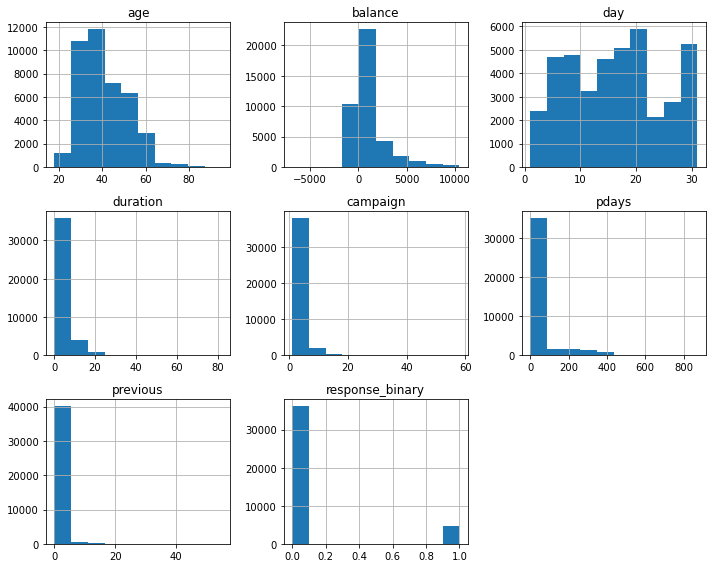

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Spécifiez les colonnes à convertir en numérique
#columns_to_convert = ['age','job','marital','education','default','balance','housing','loan','day','month',
            # 'duration','campaign','pdays','previous','poutcome','response','response_binary']
columns_to_convert = ['age','balance','day','duration','campaign','pdays','previous','response_binary']
#columns_to_convert = ['age', 'balance', 'duration', 'campaign']
# Convertissez les colonnes spécifiées en numérique
bank_data[columns_to_convert] = bank_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Histogrammes pour visualiser les distributions
bank_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

-  Matrice de corrélation pour étudier les relations entre les variables


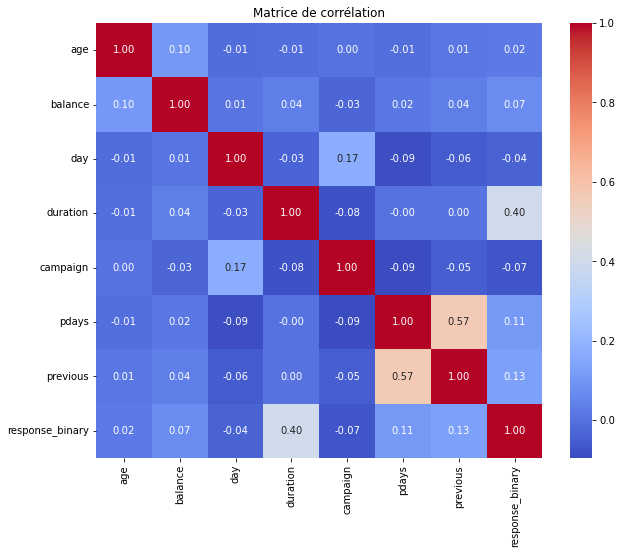

In [7]:
# Calculer la matrice de corrélation
correlation_matrix = bank_data.corr()

# Tracer la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

- Diagramme de dispersion (Scatter Plot) 

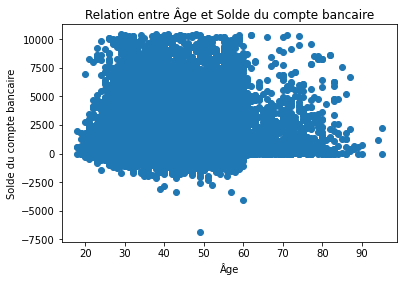

In [8]:
# Scatter plot entre 'age' et 'balance'
plt.scatter(bank_data['age'], bank_data['balance'])
plt.xlabel('Âge')
plt.ylabel('Solde du compte bancaire')
plt.title('Relation entre Âge et Solde du compte bancaire')
plt.show()

 Type du problème de classification : Il s'agit d'un problème de classification binaire

In [9]:
# Afficher les valeurs uniques de la colonne response_binary
unique_values = bank_data['response_binary'].unique()

# Vérifier le nombre de classes
num_classes = len(unique_values)
# Afficher les valeurs uniques et le nombre de classes
print("Valeurs uniques dans response_binary:", unique_values)
print("Nombre de classes:", num_classes)

Valeurs uniques dans response_binary: [nan  0.  1.]
Nombre de classes: 3


Division les colonnes en deux types de variables : cibles (Y) et caractéristiques (X).

In [10]:
# Séparation des caractéristiques et de la cible
X = bank_data.drop('response_binary', axis=1)  # Caractéristiques
Y = bank_data['response_binary']  # Cible

# Vérifier les caractéristiques (X)
print("Caractéristiques (X):")
print(X.head())  # Affiche les premières lignes de X
print()

# Vérifier la cible (Y)
print("Cible (Y):")
print(Y.head())  # Affiche les premières valeurs de Y
print()

# Comparaison avec le DataFrame original
print("Comparaison avec le DataFrame original:")
print("Colonnes dans bank_data:", bank_data.columns)
print("Colonnes dans X:", X.columns)
print("Valeurs uniques dans Y:", Y.unique())


Caractéristiques (X):
      age           job  marital  education  default  balance  housing  loan  \
NaN   NaN           job  marital  education  default      NaN  housing  loan   
0.0  58.0    management  married   tertiary       no   2143.0      yes    no   
1.0  44.0    technician   single  secondary       no     29.0      yes    no   
2.0  33.0  entrepreneur  married  secondary       no      2.0      yes   yes   
5.0  35.0    management  married   tertiary       no    231.0      yes    no   

     day  month  duration  campaign  pdays  previous  poutcome  response  
NaN  NaN  month       NaN       NaN    NaN       NaN  poutcome  response  
0.0  5.0    may      4.35       1.0   -1.0       0.0   unknown        no  
1.0  5.0    may      2.52       1.0   -1.0       0.0   unknown        no  
2.0  5.0    may      1.27       1.0   -1.0       0.0   unknown        no  
5.0  5.0    may      2.32       1.0   -1.0       0.0   unknown        no  

Cible (Y):
NaN    NaN
0.0    0.0
1.0    0.0
2.

## b) Construction du modèle

In [22]:
# Sélectionner les colonnes spécifiées
selected_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response_binary']

# Sélectionner uniquement les colonnes spécifiées
selected_data = bank_data[selected_columns]

# Supprimer les lignes avec des valeurs NaN
selected_data_cleaned = selected_data.dropna()

# Séparation des caractéristiques et de la cible
X_selected = selected_data_cleaned.drop('response_binary', axis=1)
Y_selected = selected_data_cleaned['response_binary']

# Diviser les données en ensembles d'apprentissage et de test
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, Y_selected, test_size=0.2, random_state=42
)

# Créer un nouvel objet de classifieur d'arbre de décision
clf_selected = DecisionTreeClassifier()

# Entraîner le modèle sur les données sélectionnées
clf_selected.fit(X_train_selected, y_train_selected)



Précision du modèle sur les données sélectionnées : 84.97%


## c) Evaluation du modèle

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédire sur l'ensemble de test
y_pred_selected = clf_selected.predict(X_test_selected)

# Calculer et afficher la précision du modèle
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
print(f'Précision du modèle sur les données sélectionnées : {accuracy_selected * 100:.2f}%')

# Afficher le rapport de classification et la matrice de confusion
print('\nRapport de classification :\n', classification_report( y_test_selected, y_pred_rf))
print('\nMatrice de confusion :\n', confusion_matrix(y_test, y_pred_rf))


Précision du modèle RandomForest (sans optimisation) : 89.55%

Rapport de classification :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7166
           1       0.64      0.33      0.44      1003

    accuracy                           0.90      8169
   macro avg       0.78      0.65      0.69      8169
weighted avg       0.88      0.90      0.88      8169


Matrice de confusion :
 [[6983  183]
 [ 671  332]]


- la matrice de confusion 

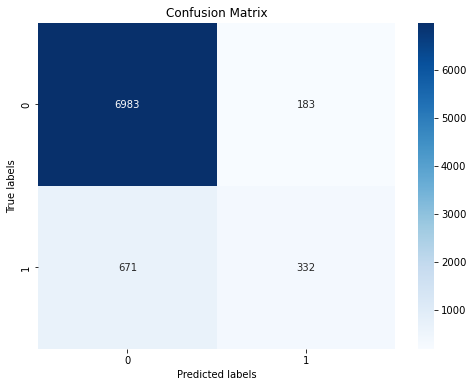

In [25]:
# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## d) Visualisation des forêts aléatoires

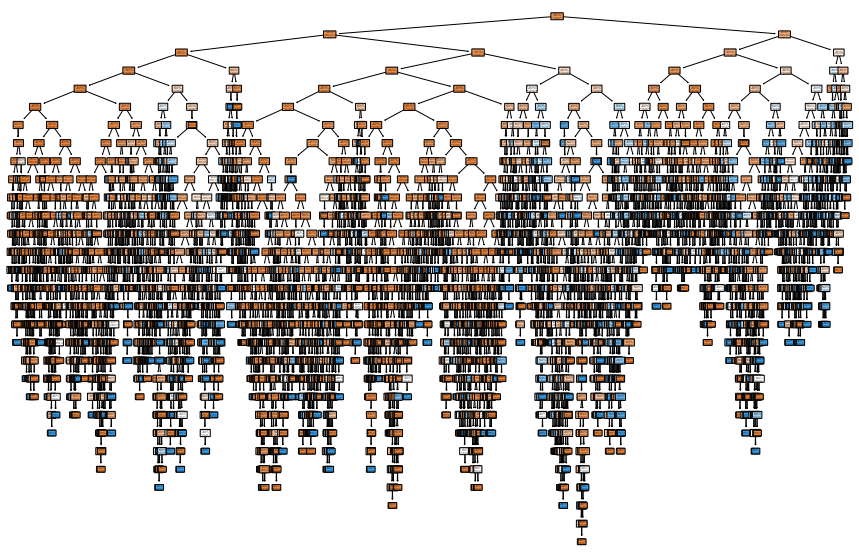

In [26]:
# Visualiser un arbre aléatoire de la forêt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()


## e)Optimisation des performances du modèle en utilisant « RandomizedSearchCV »

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Définir l'espace des hyperparamètres
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1, 20)}

# Créer un modèle RandomForestClassifier
rf = RandomForestClassifier()

# Utiliser RandomizedSearchCV pour trouver les meilleurs hyperparamètres
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, random_state=42)
rand_search.fit(X_train, y_train)

# Obtenir le meilleur modèle avec les meilleurs hyperparamètres
best_rf_model = rand_search.best_estimator_

# Afficher les meilleurs hyperparamètres
print('Meilleurs hyperparamètres:', rand_search.best_params_)


Meilleurs hyperparamètres: {'max_depth': 19, 'n_estimators': 264}


Nouveau le graphique de l’arbre de décision

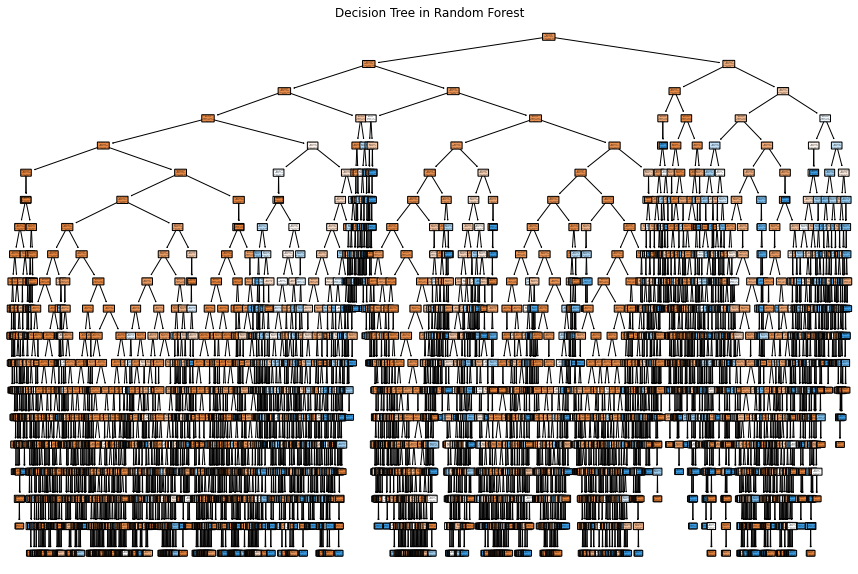

In [28]:
# Afficher le premier arbre de la forêt aléatoire
plt.figure(figsize=(15, 10))
plot_tree(best_rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.title('Decision Tree in Random Forest')
plt.show()